In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
df.shape ,test.shape

((6368, 15), (3430, 14))

In [3]:
## CLEANING AND VISUALIZATION

In [4]:
df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [5]:
df.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [6]:
df.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [7]:
df.dtypes

Product_id           object
Stall_no            float64
instock_date         object
Market_Category       int64
Customer_name        object
Loyalty_customer     object
Product_Category     object
Grade                 int64
Demand                int64
Discount_avail      float64
charges_1           float64
charges_2 (%)       float64
Minimum_price       float64
Maximum_price       float64
Selling_Price       float64
dtype: object

In [8]:
df=df.drop(['Product_id','Customer_name'],axis=1)

In [9]:
## univariate and bivariate analysis

In [10]:
df['Discount_avail'].value_counts()

0.0    5441
1.0     889
Name: Discount_avail, dtype: int64

In [11]:
df.pivot_table(values='Selling_Price',index='Product_Category')

,Selling_Price
Product_Category,
Child_care,4588.076258
Cosmetics,4508.838086
Educational,4292.141616
Fashion,4865.215485
Home_decor,4552.359110
Hospitality,4474.721781
Organic,4337.370474
Pet_care,4572.577753
Repair,4607.959947


In [12]:
df.pivot_table(values='Maximum_price',index='Product_Category')

,Maximum_price
Product_Category,
Child_care,6556.631494
Cosmetics,6601.755267
Educational,6134.445217
Fashion,6558.836268
Home_decor,6448.645763
Hospitality,6452.817420
Organic,6355.725753
Pet_care,6436.376723
Repair,6477.858491


In [13]:
df.pivot_table(values='Minimum_price',index='Product_Category')

,Minimum_price
Product_Category,
Child_care,3565.259146
Cosmetics,3582.313756
Educational,3411.135537
Fashion,3583.697674
Home_decor,3534.022838
Hospitality,3496.831746
Organic,3396.601307
Pet_care,3604.626844
Repair,3557.614009


In [14]:
df.pivot_table(values='charges_1',index='Product_Category')

,charges_1
Product_Category,
Child_care,298.682813
Cosmetics,248.925984
Educational,135.969646
Fashion,374.436960
Home_decor,250.855442
Hospitality,274.778689
Organic,124.662273
Pet_care,150.343328
Repair,247.748851


In [15]:
df.pivot_table(values='charges_2 (%)',index='Product_Category',aggfunc='median')

,charges_2 (%)
Product_Category,
Child_care,11.0
Cosmetics,15.0
Educational,11.0
Fashion,14.0
Home_decor,14.0
Hospitality,9.0
Organic,7.0
Pet_care,6.0
Repair,5.0


In [16]:
df.pivot_table(values='charges_2 (%)',index='Grade',aggfunc='median')

,charges_2 (%)
Grade,
0,10.0
1,10.0
2,10.0
3,9.0


In [17]:
df.pivot_table(values='charges_1',index='Grade',aggfunc='mean')

,charges_1
Grade,
0,266.152922
1,272.345205
2,258.322791
3,258.016461


In [18]:
## plots 

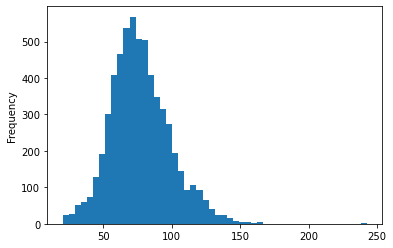

In [19]:
df['Maximum_price'].apply(np.sqrt).plot.hist(bins=50)

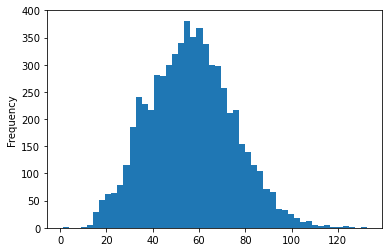

In [20]:
df['Minimum_price'].apply(np.sqrt).plot.hist(bins=50)

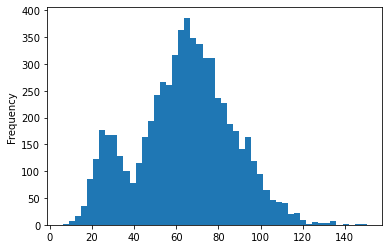

In [21]:
df['Selling_Price'].apply(np.sqrt).plot.hist(bins=50)

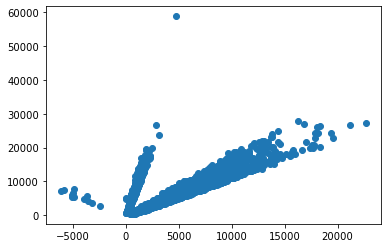

In [22]:
plt.scatter(df['Selling_Price'], df['Maximum_price'])

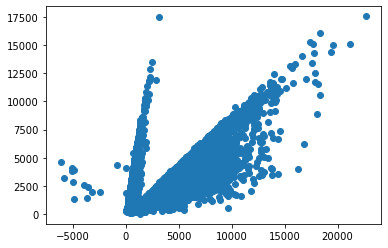

In [23]:
plt.scatter(df['Selling_Price'], df['Minimum_price'])

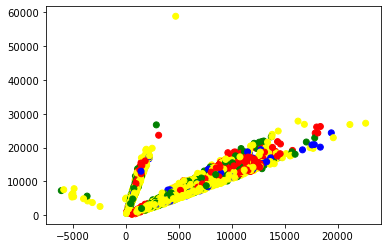

In [24]:
fig,ax=plt.subplots()
colors={3:'red',1:'blue',0:'yellow',2:'green'}
ax.scatter(df['Selling_Price'],df['Maximum_price'],c=df['Grade'].apply(lambda x:colors[x]))
plt.show()

In [25]:
###treating outlier

In [26]:
df.drop(df[df['Maximum_price'] >50000].index, inplace = True) 

In [27]:
df.drop(df[df['Minimum_price']<10].index, inplace = True) 

In [28]:
for i in df.index:
    if (df['Selling_Price'][i]<0):
        df['Selling_Price'][i]= -1*df['Selling_Price'][i]

c:\users\prachi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
df.drop(df[df['Selling_Price']<37].index, inplace = True) 

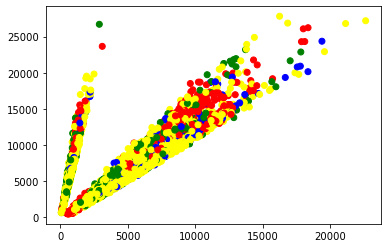

In [30]:
fig,ax=plt.subplots()
colors={3:'red',1:'blue',0:'yellow',2:'green'}
ax.scatter(df['Selling_Price'],df['Maximum_price'],c=df['Grade'].apply(lambda x:colors[x]))
plt.show()

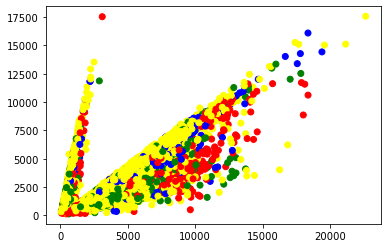

In [31]:
fig,ax=plt.subplots()
colors={3:'red',1:'blue',0:'yellow',2:'green'}
ax.scatter(df['Selling_Price'],df['Minimum_price'],c=df['Grade'].apply(lambda x:colors[x]))
plt.show()

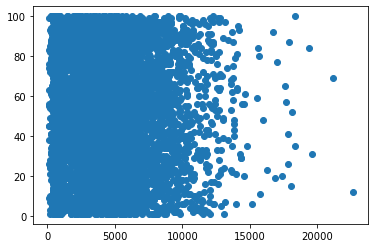

In [32]:
fig,ax=plt.subplots()
colors={3:'red',1:'blue',0:'yellow',2:'green'}
ax.scatter(df['Selling_Price'],df['Demand'])
plt.show()

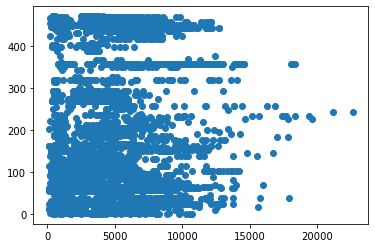

In [33]:
fig,ax=plt.subplots()
colors={3:'red',1:'blue',0:'yellow',2:'green'}
ax.scatter(df['Selling_Price'],df['Market_Category'])
plt.show()

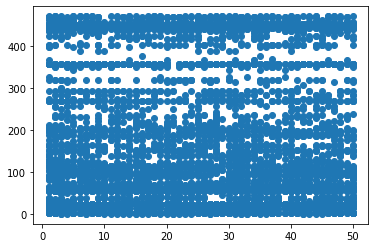

In [34]:
fig,ax=plt.subplots()
colors={3:'red',1:'blue',0:'yellow',2:'green'}
ax.scatter(df['Stall_no'],df['Market_Category'])
plt.show()

In [35]:
x= df[df['Selling_Price']<df['Minimum_price']]

In [36]:
y= df[df['Selling_Price']>df['Maximum_price']]

In [37]:
y['Grade'].value_counts()/168

0    0.595238
3    0.220238
2    0.136905
1    0.047619
Name: Grade, dtype: float64

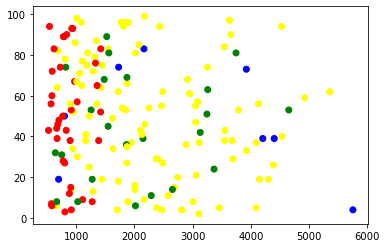

In [38]:
fig,ax=plt.subplots()
colors={3:'red',1:'blue',0:'yellow',2:'green'}
ax.scatter(y['Selling_Price'],y['Demand'],c=y['Grade'].apply(lambda x:colors[x]))
plt.show()

In [39]:
df['Grade'].value_counts()/6364

0    0.687618
2    0.173319
3    0.079195
1    0.059868
Name: Grade, dtype: float64

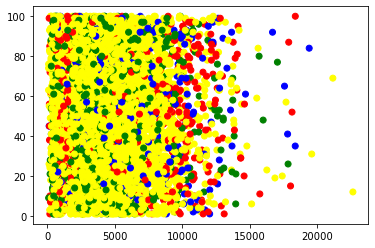

In [40]:
fig,ax=plt.subplots()
colors={3:'red',1:'blue',0:'yellow',2:'green'}
ax.scatter(df['Selling_Price'],df['Demand'],c=df['Grade'].apply(lambda x:colors[x]))
plt.show()

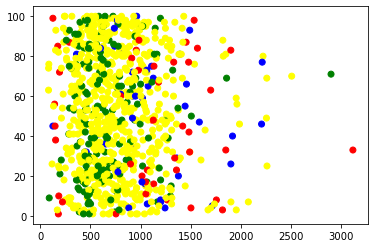

In [41]:
fig,ax=plt.subplots()
colors={3:'red',1:'blue',0:'yellow',2:'green'}
ax.scatter(x['Selling_Price'],x['Demand'],c=x['Grade'].apply(lambda x:colors[x]))
plt.show()

In [42]:
x['Grade'].value_counts()/876

0    0.715753
2    0.186073
3    0.050228
1    0.047945
Name: Grade, dtype: float64

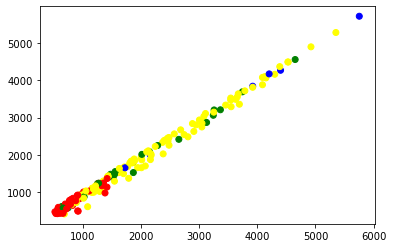

In [43]:
fig,ax=plt.subplots()
colors={3:'red',1:'blue',0:'yellow',2:'green'}
ax.scatter(y['Selling_Price'],y['Maximum_price'],c=y['Grade'].apply(lambda x:colors[x]))
plt.show()

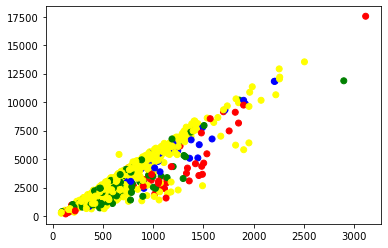

In [44]:
fig,ax=plt.subplots()
colors={3:'red',1:'blue',0:'yellow',2:'green'}
ax.scatter(x['Selling_Price'],x['Minimum_price'],c=x['Grade'].apply(lambda x:colors[x]))
plt.show()

In [45]:
## filling null values and feature selection and engineering

In [46]:
df=df.dropna(subset=['Minimum_price','Maximum_price'],how='all')

In [47]:
df=df.dropna(subset=['Selling_Price','Maximum_price'],how='all')

In [48]:
df['Maximum_price']=df['Maximum_price'].apply(np.sqrt)

In [49]:
df['Minimum_price']=df['Minimum_price'].apply(np.sqrt)

In [50]:
df['Selling_Price']=df['Selling_Price'].apply(np.sqrt)

In [51]:
def fill(x):
    if pd.isnull(x['Minimum_price'])==True:
         return 2*(x['Selling_Price'])-x['Maximum_price']
    else:
        return x['Minimum_price']

In [52]:
df['Minimum_price']=df.apply(lambda x: fill(x),axis=1)

In [53]:
def fill(x):
    if pd.isnull(x['Selling_Price'])==True:
        if (x['Grade']==3 and x['Maximum_price']<30):
                return x['Maximum_price']
        elif ((x['Grade']==2 or x['Grade']==0)and x['Minimum_price']<50):
                return x['Minimum_price']
        else :
            return (x['Maximum_price']+x['Minimum_price'])/2
    else:
        return x['Selling_Price']

In [54]:
df['Selling_Price']=df.apply(lambda x: fill(x),axis=1)

In [55]:
def fill(x):
    if pd.isnull(x['Maximum_price'])==True:
        if (x['Grade']==3 and x['Selling_Price']<30):
                return x['Selling_Price']
        else :
            return (2*x['Selling_Price']-x['Minimum_price'])
    else:
        return x['Maximum_price']

In [56]:
df['Maximum_price']=df.apply(lambda x: fill(x),axis=1)

In [57]:
df.isnull().sum()

Stall_no              5
instock_date          0
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price         0
Maximum_price         0
Selling_Price         0
dtype: int64

In [58]:
df['Stall_no'].fillna (value=(df['Stall_no'].mode()[0]),inplace= True)

In [59]:
import random

In [60]:
def fill(x):
    if pd.isnull(x['charges_1'])==True:
        if x['Product_Category']=='Technology':
            return random.choice([585,567,623])
        elif x['Product_Category']=='Repair':
            return random.choice([259,227,284])
        elif x['Product_Category']=='Pet_care':
            return random.choice([129,146,101])
        elif x['Product_Category']=='Organic':
            return random.choice([113,124,128])
        elif x['Product_Category']=='Hospitality':
            return random.choice([291,294,225])
        elif x['Product_Category']=='Home_decor':
            return random.choice([240,272,284])
        elif x['Product_Category']=='Fashion':
            return random.choice([391,398,373])
        elif x['Product_Category']=='Educational':
            return random.choice([134,147])
        elif x['Product_Category']=='Cosmetics':
            return random.choice([216,208,284])
        elif x['Product_Category']=='Child_care':
            return random.choice([349,290,310])
    else:
        return x['charges_1']
            

In [61]:
df['charges_1']=df.apply(lambda x: fill(x),axis=1)

In [62]:
def fill(x):
    if pd.isnull(x['charges_2 (%)'])==True:
        if x['Product_Category']=='Technology':
            return random.choice([5,16])
        elif x['Product_Category']=='Repair':
            return random.choice([4,7,9])
        elif x['Product_Category']=='Pet_care':
            return random.choice([3,11])
        elif x['Product_Category']=='Organic':
            return random.choice([7,6])
        elif x['Product_Category']=='Hospitality':
            return random.choice([5,9])
        elif x['Product_Category']=='Home_decor':
            return random.choice([10,17,16])
        elif x['Product_Category']=='Fashion':
            return random.choice([12,11])
        elif x['Product_Category']=='Educational':
            return random.choice([16,14,6])
        elif x['Product_Category']=='Cosmetics':
            return random.choice([14,15])
        elif x['Product_Category']=='Child_care':
            return random.choice([6,14,15])
    else:
        return x['charges_2 (%)']
            
            

In [63]:
df['charges_2 (%)']=df.apply(lambda x: fill(x),axis=1)

In [64]:
df['Discount_avail'].fillna (value=(df['Discount_avail'].mode()[0]),inplace= True)

In [65]:
df.isnull().sum()

Stall_no            0
instock_date        0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

In [66]:
df.dtypes

Stall_no            float64
instock_date         object
Market_Category       int64
Loyalty_customer     object
Product_Category     object
Grade                 int64
Demand                int64
Discount_avail      float64
charges_1           float64
charges_2 (%)       float64
Minimum_price       float64
Maximum_price       float64
Selling_Price       float64
dtype: object

In [67]:
df['date']= pd.to_datetime(df.instock_date)

In [68]:
df['year']=df['date'].dt.year

In [69]:
df=df.drop(['instock_date','date'],axis=1)

In [70]:
k={2016:3,2015:2,2014:1}
def fill(x):
    return k[x['year']]

In [71]:
df['year']=df.apply(lambda x: fill(x),axis=1)

In [72]:
k={'Yes':1,'No ':0}
def fill(x):
       return k[x['Loyalty_customer']]


In [73]:
df['Loyalty_customer']=df.apply(lambda x: fill(x),axis=1)

In [74]:
df=df.astype({'Loyalty_customer':'int64'})

In [75]:
k={3:4,1:3,0:2,2:1}
def fill(x):
     return k[x['Grade']]

In [76]:
df['Grade']=df.apply(lambda x: fill(x),axis=1)

In [79]:
df=pd.get_dummies(df,drop_first=True)

In [77]:
df.describe()

,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,year
count,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000
mean,25.305285,199.273514,0.610098,2.044825,50.912394,0.139667,265.326990,10.139037,56.508446,76.887393,63.723376,2.319755
std,14.322366,170.268578,0.487766,0.740120,29.095305,0.346668,124.998042,4.312387,18.374040,22.468691,22.726117,0.485909
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000,-22.220850,-12.457295,9.069325,1.000000
25%,13.000000,55.000000,0.000000,2.000000,26.000000,0.000000,163.000000,7.000000,43.315701,62.627869,49.533544,2.000000
50%,25.000000,132.000000,1.000000,2.000000,51.000000,0.000000,253.000000,10.000000,56.191636,75.109918,64.890044,2.000000
75%,37.000000,403.000000,1.000000,2.000000,76.000000,0.000000,315.000000,14.000000,68.534663,90.090232,78.535776,3.000000
max,50.000000,471.000000,1.000000,4.000000,100.000000,1.000000,649.000000,17.000000,132.589592,166.814268,150.460380,3.000000


In [ ]:
##MODEL

In [1]:
x = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']
x.shape, y.shape

NameError: name 'df' is not defined

In [81]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y= train_test_split(x, y, test_size = 0.20,random_state = 42)

In [82]:
from sklearn.ensemble import ExtraTreesRegressor 
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [83]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [86]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [88]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [89]:
rf_random.fit(train_x,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [90]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [91]:
rf_random.best_score_

-5.917915479507555

In [92]:
predictions=rf_random.predict(valid_x)

In [93]:
from sklearn import metrics

In [ ]:
## scoring (evaluation metrics)

In [95]:
print(max(0,100-np.sqrt(metrics.mean_squared_error(np.log(valid_y),np.log(predictions)))))

99.94352562615371


In [ ]:
## treating test data 

In [96]:
test['Stall_no'].fillna (value=(test['Stall_no'].mode()[0]),inplace= True)

In [97]:
test=test.drop('Customer_name',axis=1)

In [98]:
test['date']= pd.to_datetime(test.instock_date)

In [99]:
test['year']=test['date'].dt.year

In [100]:
test=test.drop(['instock_date','date'],axis=1)

In [101]:
k={2016:3,2015:2,2014:1}
def fill(x):
       return k[x['year']]

In [102]:
test['year']=test.apply(lambda x: fill(x),axis=1)

In [103]:
k={'Yes':1,'No ':0}
def fill(x):
       return k[x['Loyalty_customer']]

In [104]:
test['Loyalty_customer']=test.apply(lambda x: fill(x),axis=1)

In [105]:
test=test.astype({'Loyalty_customer':'int64'})

In [106]:
test.isnull().sum()

Product_id           0
Stall_no             0
Market_Category      0
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
year                 0
dtype: int64

In [107]:
def fill(x):
    if pd.isnull(x['charges_1'])==True:
        if x['Product_Category']=='Technology':
            return 530
        elif x['Product_Category']=='Repair':
            return 247
        elif x['Product_Category']=='Pet_care':
            return 144
        elif x['Product_Category']=='Organic':
            return 129
        elif x['Product_Category']=='Hospitality':
            return 215
        elif x['Product_Category']=='Home_decor':
            return 285
        elif x['Product_Category']=='Fashion':
            return 393
        elif x['Product_Category']=='Educational':
            return 158
        elif x['Product_Category']=='Cosmetics':
            return 212
        elif x['Product_Category']=='Child_care':
            return 308
    else:
        return x['charges_1']

In [108]:
test['charges_1']=test.apply(lambda x: fill(x),axis=1)

In [109]:
def fill(x):
    if pd.isnull(x['charges_2 (%)'])==True:
        if x['Product_Category']=='Organic':
            return 7
        elif x['Product_Category']=='Hospitality':
            return 12
        elif x['Product_Category']=='Educational':
            return 14
        elif x['Product_Category']=='Cosmetics':
            return 13
    else:
        return x['charges_2 (%)']

In [110]:
test['charges_2 (%)']=test.apply(lambda x: fill(x),axis=1)

In [111]:
def fill(x):
    if pd.isnull(x['Minimum_price'])==True:
        if x['Product_Category']=='Technology':
            return 3563
        elif x['Product_Category']=='Repair':
            return 3333
        elif x['Product_Category']=='Pet_care':
            return 3463
        elif x['Product_Category']=='Organic':
            return 3302
        elif x['Product_Category']=='Hospitality':
            return 3290
        elif x['Product_Category']=='Home_decor':
            return 3459
        elif x['Product_Category']=='Fashion':
            return 3456
        elif x['Product_Category']=='Educational':
            return 3391
        elif x['Product_Category']=='Cosmetics':
            return 3496
        elif x['Product_Category']=='Child_care':
            return 3675
    else:
        return x['Minimum_price']

In [112]:
test['Minimum_price']=test.apply(lambda x: fill(x),axis=1)

In [113]:
test.isnull().sum()

Product_id          0
Stall_no            0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
year                0
dtype: int64

In [114]:
k={3:4,1:3,0:2,2:1}
def fill(x):
     return k[x['Grade']]

In [115]:
test['Grade']=test.apply(lambda x: fill(x),axis=1)

In [119]:
test['Maximum_price']=test['Maximum_price'].apply(np.sqrt)

In [120]:
test['Minimum_price']=test['Minimum_price'].apply(np.sqrt)

In [116]:
id= test['Product_id']

In [117]:
test=test.drop('Product_id',axis=1)

In [118]:
test=pd.get_dummies(test,drop_first=True)

In [122]:
pred=rf_random.predict(test)

In [123]:
pred

array([ 57.3655072 ,  44.16204006, 108.30684217, ...,  78.90890745,
        58.78997626,  34.13718513])

In [2]:
#pred=np.square(pred)

In [132]:
pred=pd.DataFrame(pred)

In [135]:
submit1= pd.DataFrame()

In [136]:
id=pd.DataFrame(id)

In [137]:
submit1['Product_id']=id['Product_id']

In [1]:
#submit1['Selling_Price']=pred[0]*-1

In [140]:
submit1.to_csv("D:\Desktop\Submission2.csv")